### Linear Advection Equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Numerical solution of 1D linear advection equation from textbook

nx = 61 # number of pointes from x = 0 to x = 1

nt = 50
c = 0.4
x = np.linspace(0,1,nx)


In [3]:
phi = np.where(x<0.5, 0.5*(1-np.cos(4*np.pi*x)), 0)
phiOld = phi.copy()

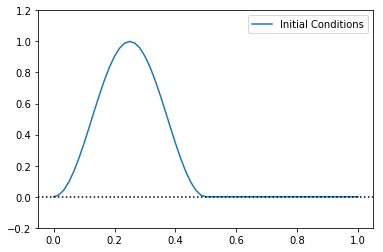

In [4]:
plt.clf()
plt.ion()
plt.plot(x, phi, label = 'Initial Conditions')
plt.legend(loc = 'best')
plt.axhline(0,linestyle=':', color = "black")
plt.ylim([-0.2, 1.2])
plt.show()

## Explicit Schemes

In [5]:
def FTBS(y, phiOld, phi, nx):
    if (y - 1) >= 0 and (y - 1)<= nx-1:
        phi[y] = phiOld[y] - c*(phiOld[y] - phiOld[y-1])
    elif (y - 1) < 0 and (y - 1)<= nx-1:
        phi[y] = phiOld[y] - c*(phiOld[y] - phiOld[nx - 2 - y])
    else:
        print("error")
    return phi

def FTCS(y, phiOld, phi, nx):
    if (y - 1) >= 0 and (y - 1)<= nx-1:
        phi[y] = phiOld[y] - c/2*(phiOld[y + 1] - phiOld[y-1])
    elif (y - 1) < 0 and (y - 1)<= nx-1:
        phi[y] = phiOld[y] - c*(phiOld[y] - phiOld[nx - 2 - y])
    else: 
        print("error")
    return phi
        

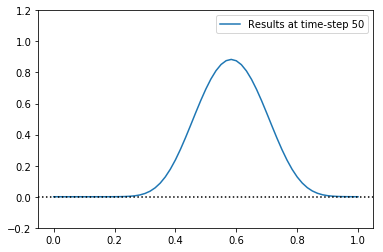

In [6]:
phi = np.where(x<0.5, 0.5*(1-np.cos(4*np.pi*x)), 0)
phiOld = phi.copy()

for it in range(nt):
    # loop over space excluding end points
    for ix in range(1, nx-1):
        phi = FTBS(ix, phiOld, phi, nx)
    phi = FTBS(0, phiOld, phi, nx)
    phiOld[nx -1] = phiOld[0]
    phiOld = phi.copy()
    # plot results
    plt.clf()
    plt.plot(x, phi, label="Results at time-step " + str(it+1))
    plt.axhline(0, linestyle=':', color='black')
    plt.ylim([-0.2, 1.2])
    plt.legend(loc='best')
    plt.draw()

press return to start simulation


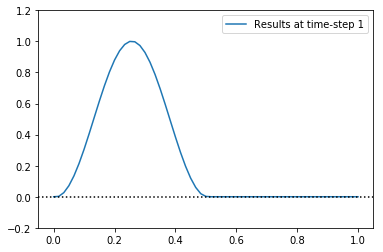

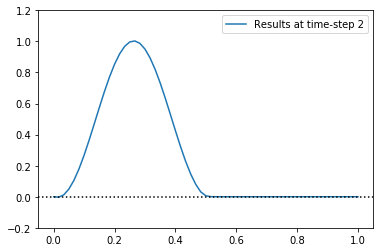

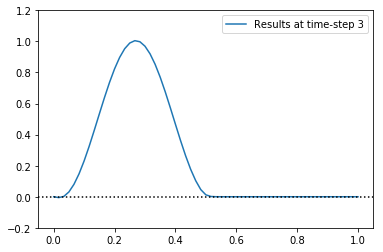

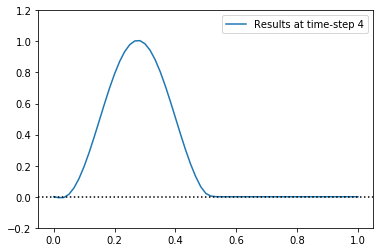

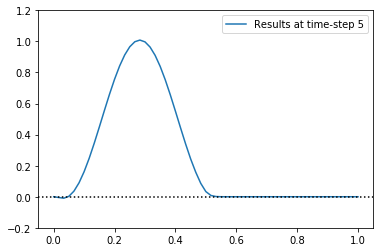

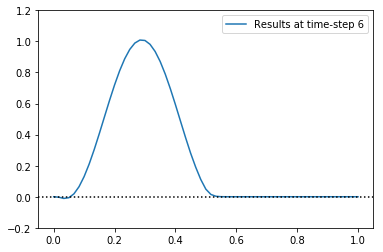

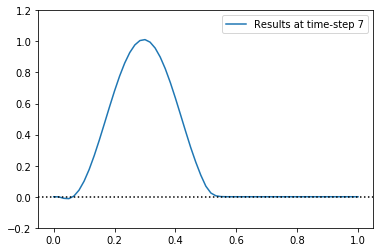

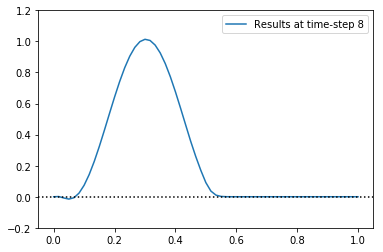

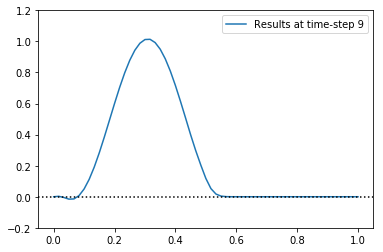

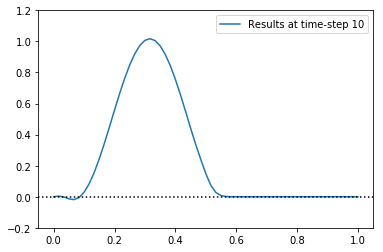

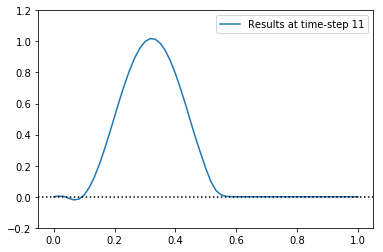

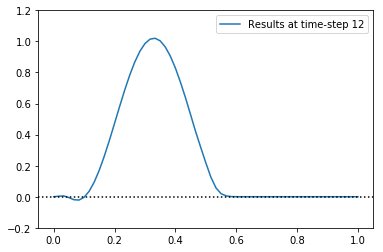

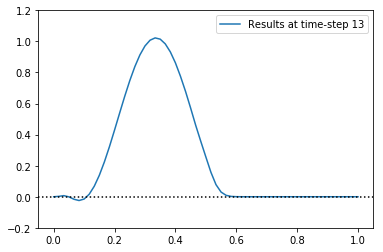

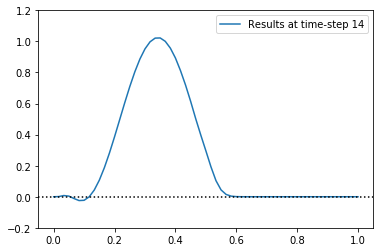

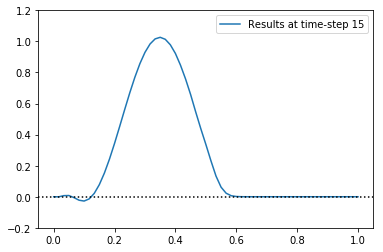

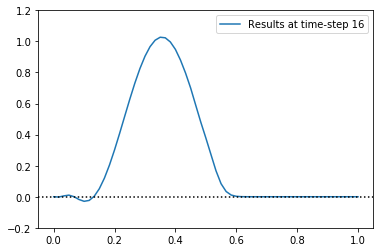

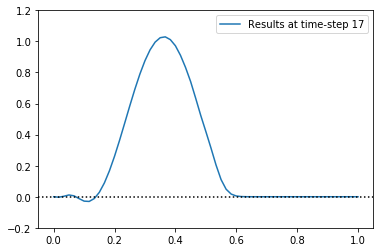

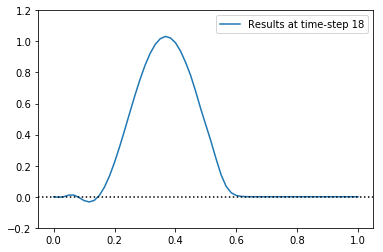

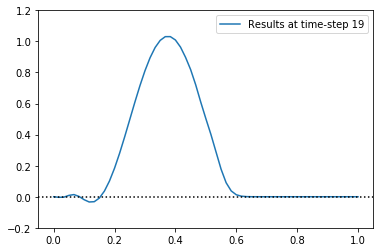

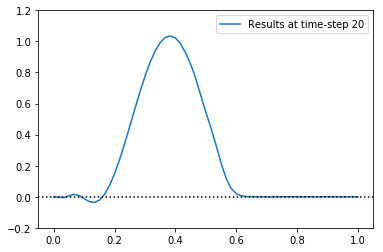

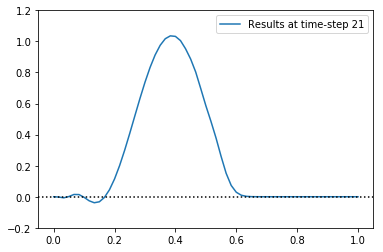

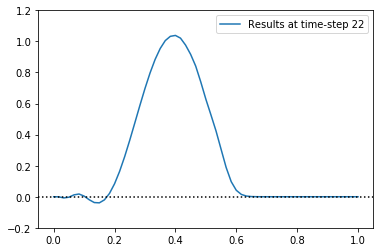

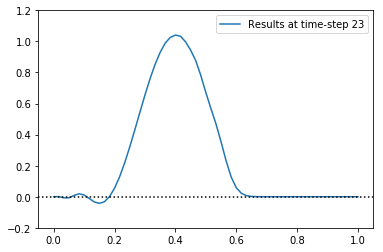

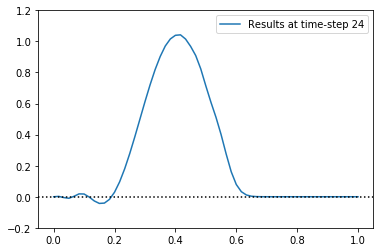

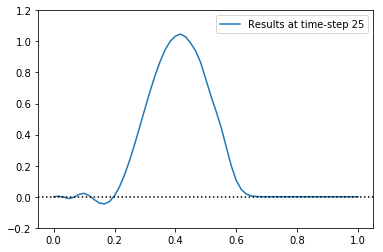

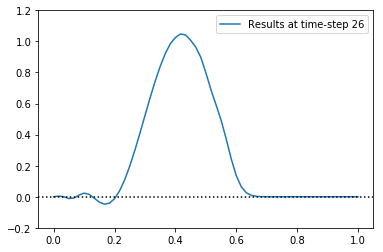

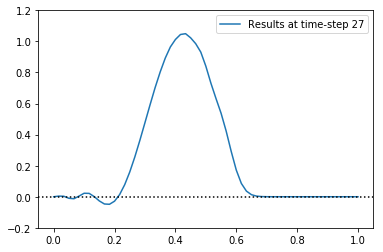

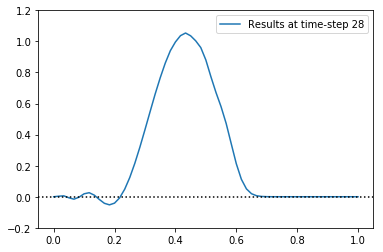

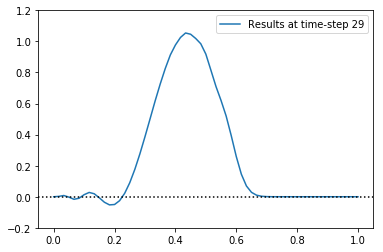

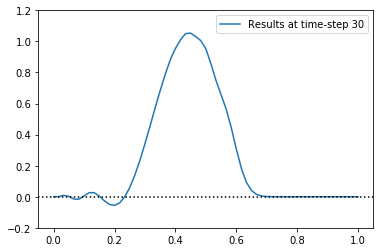

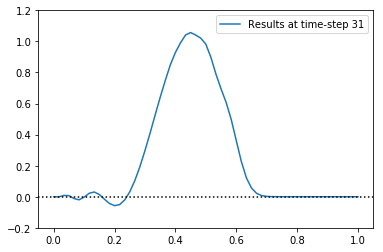

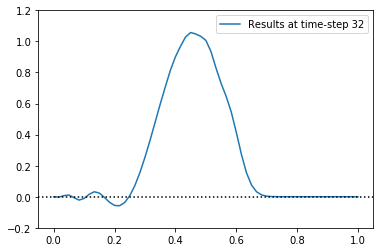

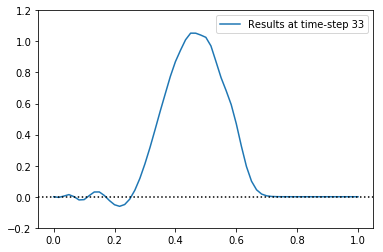

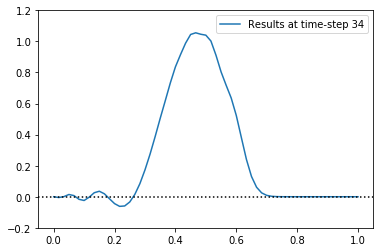

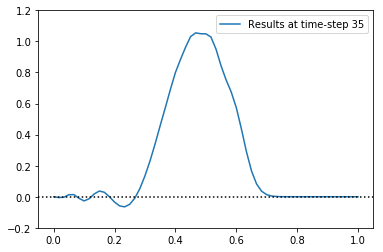

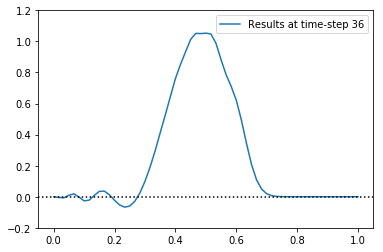

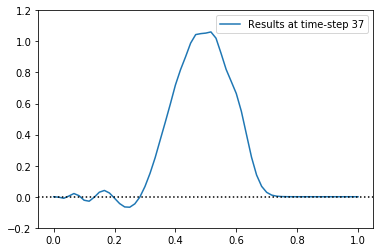

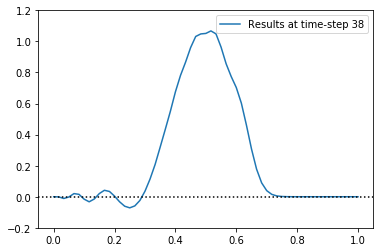

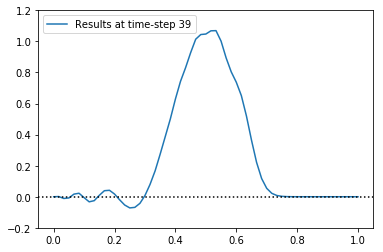

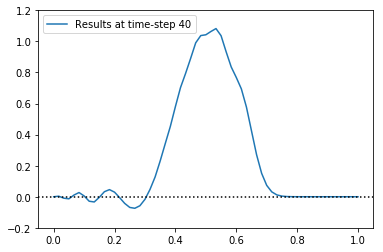

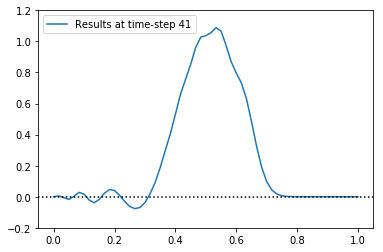

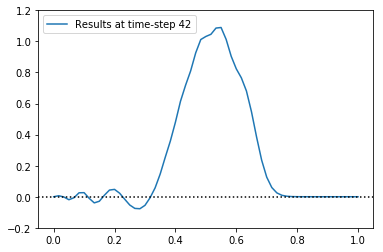

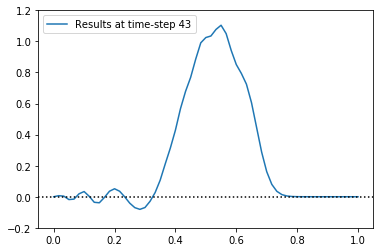

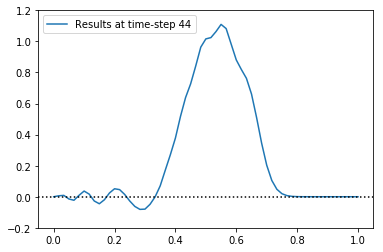

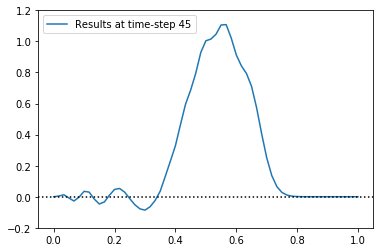

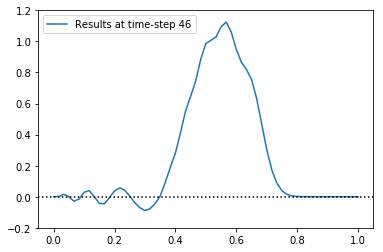

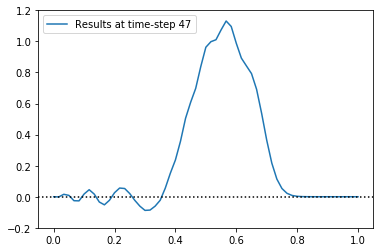

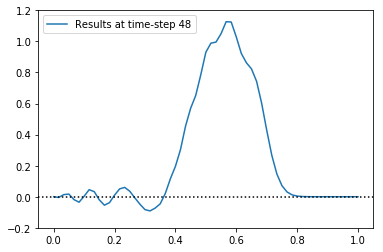

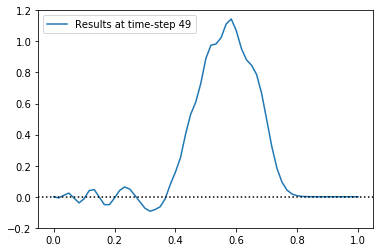

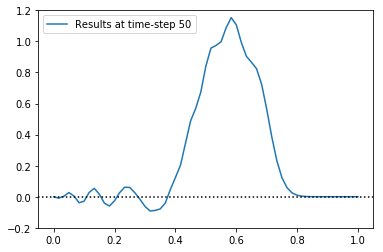

press return to end


''

In [7]:
phi = np.where(x<0.5, 0.5*(1-np.cos(4*np.pi*x)), 0)
phiOld = phi.copy()

input("press return to start simulation")


for it in range(nt):
    # loop over space excluding end points
    for ix in range(1, nx-1):
        phi = FTCS(ix, phiOld, phi, nx)
    phi = FTCS(0, phiOld, phi, nx)
    phiOld[nx -1] = phiOld[0]
    phiOld = phi.copy()
    # plot results
    plt.clf()
    plt.plot(x, phi, label="Results at time-step " + str(it+1))
    plt.axhline(0, linestyle=':', color='black')
    plt.ylim([-0.2, 1.2])
    plt.legend(loc='best')
    plt.show()
    
input("press return to end")

## Implicit Schemes

In [8]:
# defining matrix for BTCS
def BTCS_matrix(nx):
    N = nx
    matrix = np.zeros((N,N))

    for i in range(1, N-1):
        matrix[i,i] = 1
        matrix[i, i - 1] = -c/2
        matrix[i, i + 1] = c/2

    matrix[0,0] = 1
    matrix[0,1] = c/2
    matrix[0, N-1] = -c/2
    matrix[N-1, 0] = c/2
    matrix[N-1, N-1] = 1
    matrix[N-1, N-2] = -c/2
    return matrix

# crank nicholson method - don't necessarily need two matrices (the n-matrix can be incorporated in the phi
# like phi[i] - c/4*phi[i+1] + c/4*phi[i+1])
def CNCS_matrixn(nx):
    N = nx
    matrix = np.zeros((N,N))
    
    for i in range(1, N-1):
        matrix[i,i] = 1
        matrix[i, i-1] = c/4
        matrix[i, i+1] = -c/4
    
    matrix[0, 0] = 1
    matrix[0,1] = -c/4
    matrix[0, N-1] = c/4
    
    matrix[N-1, 0] = -c/4
    matrix[N-1, N-1] = 1
    matrix[N-1, N-2] = c/4
    
    
    return matrix

def CNCS_matrixn_plus_1(nx):
    N = nx
    matrix = np.zeros((N,N))
    
    for i in range(1,N-1):
        matrix[i,i] = 1
        matrix[i, i-1] = -c/4
        matrix[i, i+1] = c/4
        
    matrix[0, 0] = 1
    matrix[0,1] = c/4
    matrix[0, N-1] = -c/4

    matrix[N-1, 0] = c/4
    matrix[N-1, N-1] = 1
    matrix[N-1, N-2] = -c/4
    
    
    return matrix

In [9]:
# initializing conditions

phi = np.where(x<0.5, 0.5*(1-np.cos(4*np.pi*x)), 0)
phiOld = phi.copy()
it = 0

In [10]:
matrix = BTCS_matrix(nx)

while it <= nt:
    phi = np.linalg.solve(matrix, phiOld)
    phiOld = phi.copy()
    it = it + 1

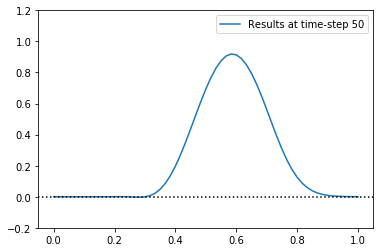

In [11]:
plt.clf()
plt.plot(x, phiOld, label="Results at time-step " + str(it-1))
plt.axhline(0, linestyle=':', color='black')
plt.ylim([-0.2, 1.2])
plt.legend(loc='best')
plt.show()

In [12]:
matrixn = CNCS_matrixn(nx)
matrixnplusone = CNCS_matrixn_plus_1(nx)

In [13]:
while it <= nt:
    phi = np.linalg.solve(matrixnplusone, matrixn*phiOld)
    phiOld = phi.copy()
    it = it + 1

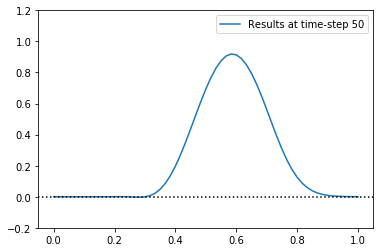

In [14]:
plt.clf()
plt.plot(x, phiOld, label="Results at time-step " + str(it-1))
plt.axhline(0, linestyle=':', color='black')
plt.ylim([-0.2, 1.2])
plt.legend(loc='best')
plt.show()